# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 8

## Problem 1  

I want to use the function **ipmag.curie()**.  This is in the **ipmag** module which I must first import.  Then I need to understand how to call the function, so I use the help function for that.

In [6]:
#!curie.py -f Chapter_8/curie_example.dat -h

import pmagpy.ipmag as ipmag
help(ipmag.curie)

Help on function curie in module pmagpy.ipmag:

curie(path_to_file='.', file_name='magic_measurements.txt', window_length=3, save=False, save_folder='.', fmt='svg', t_begin='', t_end='')
    Plots and interprets curie temperature data.
    ***
    The 1st derivative is calculated from smoothed M-T curve (convolution
    with trianfular window with width= <-w> degrees)
    ***
    The 2nd derivative is calculated from smoothed 1st derivative curve
    (using the same sliding window width)
    ***
    The estimated curie temp. is the maximum of the 2nd derivative.
    Temperature steps should be in multiples of 1.0 degrees.
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains file (default is current directory, '.')
    file_name : name of file to be opened (default is 'magic_measurements.txt')
    window_length : dimension of smoothing window (input to smooth() function)
    save : boolean argument to save pl

I want to just look at the figures:

second derivative maximum is at T=205


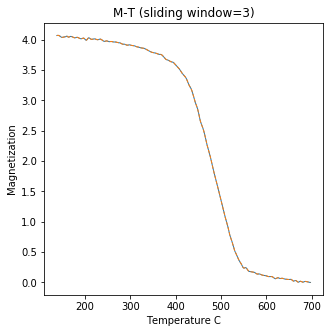

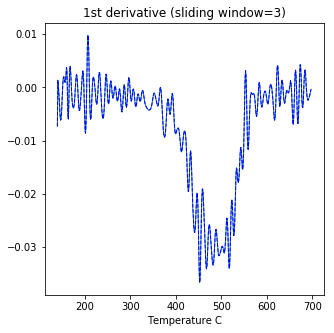

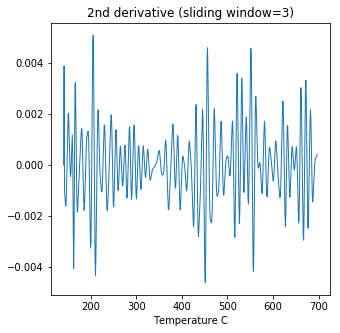

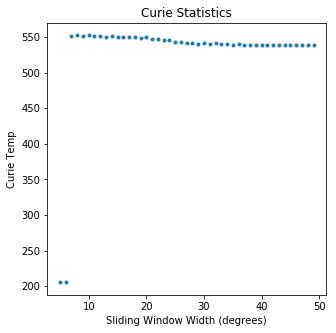

In [4]:
ipmag.curie(path_to_file='Chapter_8',file_name='curie_example.dat') 

The Curie Temperature of this specimen is about 550$^{\circ}$C.

Now for the other file...

second derivative maximum is at T=391


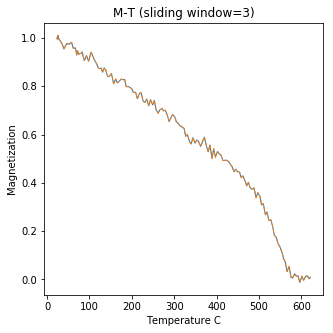

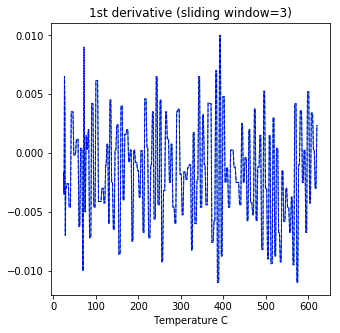

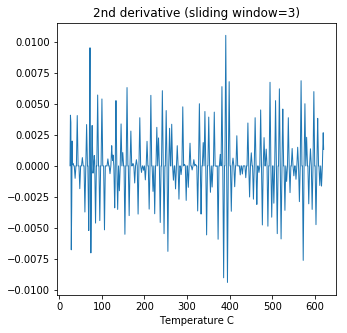

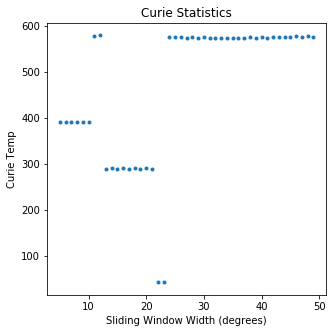

In [5]:
ipmag.curie(path_to_file='Chapter_8',file_name='curie_example2.dat') 

Hmmm.  This one IS noisier and  so I should try it with a truncated window homing in on what seems to be the true Curie Temperature of around 580$^{\circ}$C.   

second derivative maximum is at T=568


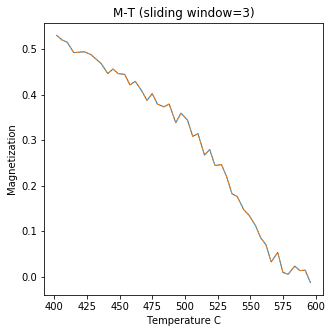

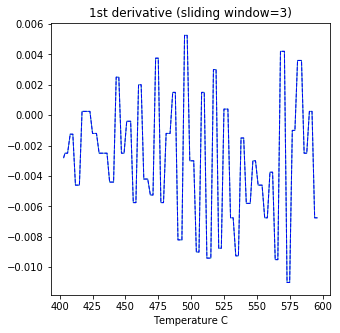

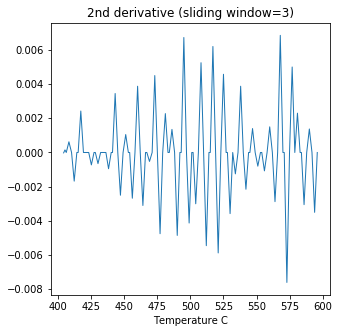

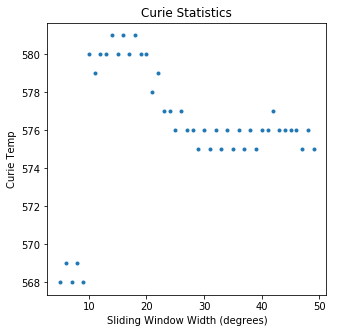

In [13]:
ipmag.curie(path_to_file='Chapter_8',file_name='curie_example2.dat',t_begin=400,t_end=600) 

So it appears that the 'true' Tc for this specimen is about 576$^{\circ}$C.  

## Problem 2:

To do this problem, I first have to read in the data file.  I looked at it with a text editor first and noticed that there was some sort of description in the first line and column headers in the second (or line 1 counting from zero as python normally does).  This is a tab delimited file, so the separation (sep) is '\t'.   I read in the data with pandas, print out the top few lines and convert it to a dataframe here: 

In [14]:
import pandas as pd  # import the module
# read in the data
data=pd.read_csv('Chapter_8/loess_rockmag.dat', sep='\t', header=1)
print (data.head()) # print the top few lines
data=pd.DataFrame(data) # convert to a Pandas DataFrame

   Depth    chi    sIRM
0   0.76  0.559  37.419
1   0.86  0.541  46.962
2   1.03  0.510  39.167
3   1.25  0.460  37.402
4   1.41  0.570  34.633


Now I want to make a bunch of plots.  One of them is for the ferromagnetic susceptibility.  I have to subtract 60 nm$^3$kg$^{-1}$ from the total susceptibility (data['chi']). Because the units of $\chi$ are in $\mu$m$^3$kg$^{-1}$, I multiply the 60 by 10$^{-3}$ to get from nano (10$^{-9}$) to micro (10$^{-6}$).

In [15]:
data['chi_f']=data['chi']-60e-3 # calculate ferromagnetic susceptibility

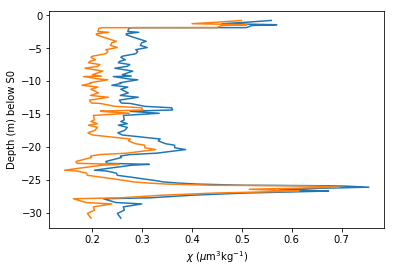

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data['chi'],-data['Depth'])
plt.ylabel('Depth (m) below S0')
plt.xlabel(r'$\chi$ ($\mu$m$^3$kg$^{-1}$)')
plt.plot(data['chi_f'],-data['Depth']);

The plot above shows total $\chi$ in blue and $\chi_f$ in green. 

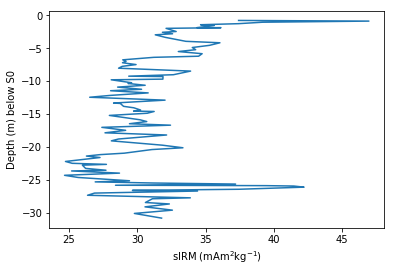

In [18]:
# plot the sIRM versus depth below reference horizon
plt.plot(data['sIRM'],-data['Depth'])  
plt.ylabel('Depth (m) below S0')
plt.xlabel(r'sIRM (mAm$^2$kg$^{-1}$)');

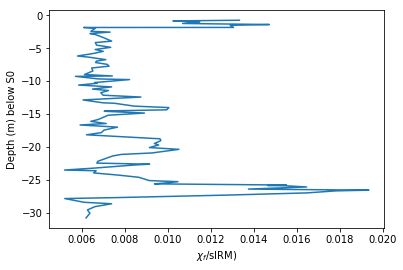

In [19]:
# and now for the chi_f over sIRM:
plt.plot(data['chi_f']/data['sIRM'],-data['Depth'])
plt.ylabel('Depth (m) below S0')
plt.xlabel(r'$\chi_f$/sIRM)');

Read the Hunt et al. (1995) paper and figure it out!

## Problem 3:

For this problem, we must read in the data, convert the volume normalized $\chi$ into mass normalized units, and the mass into density.   Then we plot the $\chi$ data versus color (by number) and density.   Looking at the data in the datafile, it also has some sort of header and columns in the second line (as in Problem 2).  

In [20]:
data=pd.read_csv('Chapter_8/beach_sand.dat', sep='\t', header=1)
print (data.head() )# print the top few lines
data=pd.DataFrame(data) # convert to a Pandas DataFrame

   Specimen   chi   mass
0         1  0.05   9.92
1         2  0.20  10.00
2         3  0.40  11.03
3         4  1.94  11.29
4         5  3.30  11.31


First convert mass to kg.  Then multiply chi by units of 10^-5, then by the assumed volume (in m$^3$) and then divide by mass (in kg).  

In [25]:
data['mass_kg']=data['mass']*1e-3 # convert from grams to kilograms.   
data['chi_norm']=data['chi']*1e-5 # put into SI
data['chi_norm']=data['chi_norm']*7e-6 # take out volume in m^3
data['chi_norm']=data['chi_norm']/(data['mass_kg']) # divide by mass in kg
print (data.head())

   Specimen   chi   mass  mass_kg      chi_norm          rho
0         1  0.05   9.92  0.00992  3.528226e-10  1417.142857
1         2  0.20  10.00  0.01000  1.400000e-09  1428.571429
2         3  0.40  11.03  0.01103  2.538531e-09  1575.714286
3         4  1.94  11.29  0.01129  1.202834e-08  1612.857143
4         5  3.30  11.31  0.01131  2.042440e-08  1615.714286


We need density which should be in  kg/m$^3$.  

In [22]:
data['rho']=data['mass_kg']/7e-6

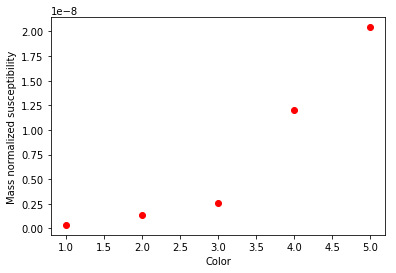

In [23]:
plt.plot(data['Specimen'],data['chi_norm'],'ro') # plot as red dots
plt.xlabel('Color')
plt.ylabel('Mass normalized susceptibility');

The darker the specimen (higher Specimen number), the higher the susceptibility.

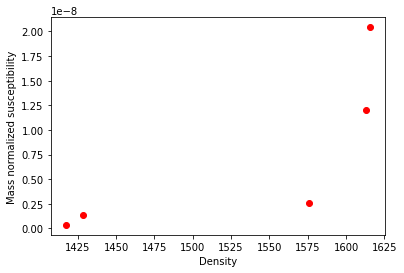

In [24]:
plt.plot(data['rho'],data['chi_norm'],'ro')
plt.xlabel('Density')
plt.ylabel('Mass normalized susceptibility');

The denser the specimen, the higher the susceptibility, but the relationship is not linear. 

The darker minerals are magnetite, pyroxene, amphibole and biotite.  Magnetite is a very dense ($\sim$5000 kg/m$^3$) and very magnetic mineral. The more magnetite in the specimens, the denser and more magnetic (and darker) the specimen becomes.    You could test this by extracting the most magnetic minerals out of the samples by suspending the material in water and using a magnet, then repeat the experiment.  The remaining material should be less dense, lighter and less magnetic. 